In [1]:
# Full Sort Neural Network


import matplotlib.pyplot as plt
import tensorflow.keras as keras

%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.models import Sequential

print("Notebook run using keras:", keras.__version__)
import sys

sys.path.append("..")

Notebook run using keras: 2.4.0


In [3]:
class FullSort(Layer):
    def __init__(self, **kwargs):
        super(FullSort, self).__init__(**kwargs)

    def build(self, input_shape):
        super(FullSort, self).build(input_shape)

    def compute_output_shape(self, input_shape):
        import pdb

        pdb.set_trace()
        return input_shape

    def call(self, inputs):
        shape = inputs.shape[1:]
        return K.reshape(tf.sort(inputs, axis=-1), [-1] + list(shape))

In [4]:
x = np.linspace(-1, 1, 1000)
y = np.sin(10 * x)

In [10]:
layers = []
layers.append(Dense(5, activation="linear", input_dim=1))  # specify the dimension of the input space
layers.append(FullSort())
layers.append(Dense(1, activation="linear"))
# layers.append(FullSort())
# layers.append(Dense(10, activation='linear'))
# layers.append(FullSort())
# layers.append(Dense(1, activation='linear'))

model = Sequential(layers)

In [11]:
model.compile("adam", "mse")

In [12]:
_ = model.predict(x)

In [13]:
from decomon.models import convert

In [14]:
# convert our model into a decomon model:
decomon_model = convert(model, forward=True, mode="forward")

ValueError: in user code:

    ../decomon/layers/decomon_layers.py:1252 call  *
        return sort(inputs, dc_decomp=self.dc_decomp, grad_bounds=self.grad_bounds,
    ../decomon/layers/utils.py:1445 sort  *
        w_u_ = K.reshape(w_u_list, axis+1)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:3020 reshape
        return array_ops.reshape(x, shape)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:195 reshape
        result = gen_array_ops.reshape(tensor, shape, name)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py:8378 reshape
        "Reshape", tensor=tensor, shape=shape, name=name)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:592 _create_op_internal
        compute_device)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3536 _create_op_internal
        op_def=op_def)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:2016 __init__
        control_input_ops, op_def)
    /anaconda3/envs/formal/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 1 but is rank 0 for '{{node full_sort_3_monotonic/Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32](full_sort_3_monotonic/Reshape/tensor, full_sort_3_monotonic/Reshape/shape)' with input shapes: [5,?,1,1], [].


In [62]:
model.fit(x, y, batch_size=32, shuffle=True, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5024
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4495
Epoch 4/100
32/32 [==============================] - 0s 977us/step - loss: 0.4275
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4246
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4088
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3952
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3934
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3695
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3720
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3436
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3564
Epoch 13/100
32/32 [===============

In [63]:
x_test = np.linspace(-1, 1, 2000)
y_pred = model.predict(x_test)

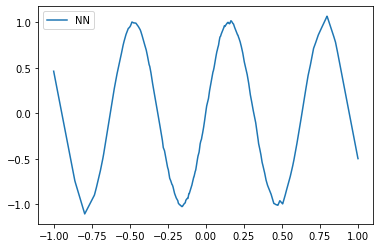

In [64]:
plt.plot(x_test, y_pred)
plt.legend(["NN"])

IndentationError: expected an indented block (utils.py, line 1432)